In [77]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, classification_report
from sklearn.metrics import roc_curve, auc

In [78]:
# !pwd

In [79]:
df = pd.read_csv("/Users/bhavi/Documents/Projects/CristianoRonaldo/Cristano_Ronaldo_Final_v1/data.csv")

In [124]:
df = df.rename(columns={'lat/lng':'lat_lng',\
                        'distance_of_shot.1': 'distance_of_shot_1', \
                        'remaining_min.1':'remaining_min_1', \
                        'power_of_shot.1':'power_of_shot_1', \
                        'knockout_match.1' : 'knockout_match_1', \
                        'remaining_sec.1' : 'remaining_sec_1'})


print (df[df.match_id.isnull()].shape) # match_id is never null


# for col in df.columns:
#     print (f"'{col}'", end=',')

(0, 34)


In [81]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min_1,power_of_shot_1,knockout_match_1,remaining_sec_1,distance_of_shot_1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [82]:
df.corr()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min_1,power_of_shot_1,knockout_match_1,remaining_sec_1,distance_of_shot_1
Unnamed: 0,1.000000,0.031239,-0.020904,0.031881,-0.004952,0.002229,0.611755,-0.004785,0.015183,-0.012693,1.000000,0.761656,NaN,0.007058,0.000610,0.005797,0.003001,0.003279
match_event_id,0.031239,1.000000,-0.030212,0.059463,-0.272789,0.956095,-0.001414,-0.022830,0.061072,-0.038705,0.029223,0.000789,NaN,-0.043133,0.022375,-0.001657,-0.003767,0.026465
location_x,-0.020904,-0.030212,1.000000,-0.014907,0.007889,-0.028939,-0.012840,0.001631,0.023483,-0.004728,-0.020701,-0.020021,NaN,0.002110,-0.000150,0.005408,0.006466,0.004695
location_y,0.031881,0.059463,-0.014907,1.000000,-0.074579,0.041263,0.001962,-0.050964,0.818727,-0.145413,0.032438,-0.013659,NaN,-0.010678,-0.000933,0.009672,-0.022644,0.323209
remaining_min,-0.004952,-0.272789,0.007889,-0.074579,1.000000,-0.043992,0.014806,0.026664,-0.058495,0.028342,-0.003587,0.014595,NaN,0.098414,-0.004447,-0.010549,0.016655,-0.022925
power_of_shot,0.002229,0.956095,-0.028939,0.041263,-0.043992,1.000000,0.010686,0.003066,0.046184,-0.034698,0.001088,0.011857,NaN,-0.018268,0.026339,-0.003296,0.007004,0.023045
knockout_match,0.611755,-0.001414,-0.012840,0.001962,0.014806,0.010686,1.000000,-0.000886,-0.009546,0.001152,0.612181,0.917184,NaN,0.005961,0.001193,0.009470,-0.003515,0.000299
remaining_sec,-0.004785,-0.022830,0.001631,-0.050964,0.026664,0.003066,-0.000886,1.000000,-0.049875,0.028964,-0.005976,-0.004893,NaN,0.006628,0.002475,0.002258,0.464134,-0.018455
distance_of_shot,0.015183,0.061072,0.023483,0.818727,-0.058495,0.046184,-0.009546,-0.049875,1.000000,-0.198234,0.016110,-0.031433,NaN,-0.006094,0.000784,0.006642,-0.025477,0.398123
is_goal,-0.012693,-0.038705,-0.004728,-0.145413,0.028342,-0.034698,0.001152,0.028964,-0.198234,1.000000,-0.010696,-0.000169,NaN,0.008384,-0.001363,-0.001224,0.012209,-0.075195


In [ ]:
# pd.scatter_matrix(df[['match_event_id','remaining_min','remaining_sec', 'remaining_min_1', 'remaining_sec_1', 'distance_of_shot_1']], alpha=0.6, figsize=(10, 10), diagonal='kde')
# plt.show()

In [84]:
'''
    Filling Missing Values of game_season by padding on previous values
'''

print(df[df.game_season.isnull()].shape)
df['game_season'] = df['game_season'].fillna(method='pad')

df['game_season'] = df['game_season'].apply(
    lambda x: x.split('-')[0]
)

# print(df[df.game_season.isnull()].shape)


(5862, 28)


In [85]:
'''
    Filling Missing Values of date_of_game by padding on previous values
'''

print(df[df.date_of_game.isnull()].shape)
df['date_of_game'] = df['date_of_game'].fillna(method='pad')

print(df[df.date_of_game.isnull()].shape)

'''
    Generating new features for day month and year
'''

df['year'] = df['date_of_game'].apply(
    lambda x: x.split('-')[0]
)

df['month'] = df['date_of_game'].apply(
    lambda x: x.split('-')[1]
)

df['day'] = df['date_of_game'].apply(
    lambda x: x.split('-')[2]
)

(1550, 28)
(0, 28)


In [86]:
'''
    Filling Missing Values of lat_lng by padding on previous values
'''

print(df[df.lat_lng.isnull()].shape)
df['lat_lng'] = df['lat_lng'].fillna(method='pad')

print(df[df.lat_lng.isnull()].shape)

'''
    lat_lng is categorical based on arena of match - we can label encode it
'''
print(df.lat_lng.unique().shape)
df['lat_lng'] = df['lat_lng'].astype('category').cat.codes

(1565, 31)
(0, 31)
(38,)


In [87]:
# Match Event Id

# for i in range(2, len(df[df.match_event_id.isnull()])):
#     df.loc[i, 'match_event_id'] = df.loc[i-1, 'match_event_id']

'''
    Fill Missing Match Event Id By Looking at Row Above And Below with same Game Id,
    pass in case of any error.
'''
for index, row in df[df.match_event_id.isnull()].iterrows():
    try:
        if df.loc[index - 1, 'match_id'] == row['match_id']:
            df.loc[index, 'match_event_id'] = int(df.loc[index-1, 'match_event_id']) + 1
        elif df.loc[index + 1, 'match_id'] == row['match_id']:
            df.loc[index, 'match_event_id'] = int(df.loc[index+1, 'match_event_id']) + 1
        else:
            df.loc[index, 'match_event_id'] = int(df.loc[index-1, 'match_event_id']) + 1
    except:
        pass

'''
    Fill Remaining Rows(only 10) with mode value
'''
df['match_event_id'] = df['match_event_id'].fillna(method='pad')
# df['match_event_id'].fillna(df['match_event_id'].mode()[0], inplace=True)

In [88]:
'''
    Filling Missing Valued For Knockout Matches
'''
    
df['knockout_match'] = df['knockout_match'].fillna(method='pad')

In [89]:
df[df.distance_of_shot.isnull()].shape

(1567, 31)

In [90]:
# df['distance_of_shot'] = df.apply(
#     lambda row: row['distance_of_shot_1'] if np.isnan(row['distance_of_shot']) and (row['distance_of_shot_1']).is_integer() else row['distance_of_shot'],
#     axis=1
# )
# Filling remaing missing distance values with mean
# df['distance_of_shot'].fillna(df['distance_of_shot'].mean(), inplace=True)


df['remaining_min'] = df.apply(
    lambda row: row['remaining_min_1'] if np.isnan(row['remaining_min']) and (row['remaining_min_1']).is_integer() else row['remaining_min'],
    axis=1
)
'''
    Time Remaining has no significant correlation with any of the features. Replacing missing 
    values of it by mean value of feature
'''
df['remaining_min'] = df['remaining_min'].fillna(method='pad')

In [91]:
# df['distance_of_shot'] = df.apply(
#     lambda row: row['distance_of_shot_1'] if np.isnan(row['distance_of_shot']) and (row['distance_of_shot_1']).is_integer() else row['distance_of_shot'],
#     axis=1
# )
# Filling remaing missing distance values with mean
# df['distance_of_shot'].fillna(df['distance_of_shot'].mean(), inplace=True)


df['remaining_sec'] = df.apply(
    lambda row: row['remaining_sec_1'] if np.isnan(row['remaining_sec']) and (row['remaining_sec_1']).is_integer() else row['remaining_min'],
    axis=1
)
'''
    remaining_sec has no significant correlation with any of the features. Replacing missing 
    values of it by mean value of feature
'''
df['remaining_sec'] = df['remaining_sec'].fillna(method='pad')

In [92]:
df[df.distance_of_shot.isnull()].shape

(1567, 31)

In [93]:
'''
    Preprocessing area field to contain only area abbreviation
'''
def findArea(x):
    if type(x) == float and np.isnan(x):
        return x
    else:
        return x.split('(')[1].split(')')[0]

df["area_of_shot"] = df["area_of_shot"].apply(findArea)

'''
    Label encoding area of shot. It encodes NaN value as -1. This will be handled as a different category when we One Hot Encode this while training.
'''

# print(df['area_of_shot'])
# df['area_of_shot'].fillna("Unique", inplace=True) #Replacing NaN values with a unique value(quite literally)
df['area_of_shot'] = df['area_of_shot'].astype('category').cat.codes
# print(df['area_of_shot'])

In [94]:
df[df.area_of_shot == -1].shape

(1502, 31)

In [95]:
'''
    Preprocessing Range of Shot to give lower and upper range
'''
def processRangeOfShot(row):
    range_of_shot = str(row['range_of_shot'])
    try:
        if "Less Than" in range_of_shot:
            return 0, 8
        elif "+" in range_of_shot:
            return 24, 32
        else:
            low = range_of_shot.split('-')[0]
            high = range_of_shot.split('-')[1][0:2]
            return low, high
    except Exception as e:
        return float('NaN'), float('NaN')
    
df['lower_range'], df['upper_range'] = zip(*df.apply(processRangeOfShot, axis=1))

# df['lower_range'].fillna(df['lower_range'].mode()[0], inplace=True)
# df['upper_range'].fillna(df['upper_range'].mode()[0], inplace=True)

In [96]:
df[df.lower_range.isnull()].shape, df[df.upper_range.isnull()].shape

((1645, 33), (1645, 33))

In [97]:
''' 
    Processing Home/away
'''
def processHome(row):
    val = row['home/away']
    try:
        if '@' in val:
            return 0
        elif 'vs' in val:
            return 1
    except:
        return val
    
df['home'] = df.apply(processHome, axis=1)

'''
    Filling Missing Values
'''
df['home'] = df['home'].fillna(method='pad')

In [98]:
'''
    One of 'type_of_shot' and 'type_of_combined_shot' is always present in data
'''

print(df[df.type_of_shot.isnull() & df.type_of_combined_shot.isnull()].shape)

'''
    Label encoding type_of_shot and type_of_combined_shot. It encodes NaN value as -1. This will be handled when we One Hot Encode this while training.
'''
df['type_of_shot'].fillna("Unique", inplace=True) #Replacing NaN values with a unique value(quite literally)
df['type_of_shot'] = df['type_of_shot'].astype('category').cat.codes

df['type_of_combined_shot'].fillna("Unique", inplace=True) #Replacing NaN values with a unique value(quite literally)
df['type_of_combined_shot'] = df['type_of_combined_shot'].astype('category').cat.codes


(0, 34)


In [99]:
'''
    Filling Missing data with mode and then label encoding
'''

# df['shot_basics'].fillna(df['shot_basics'].mode()[0], inplace=True)
df['shot_basics'] = df['shot_basics'].astype('category').cat.codes

In [100]:
df[df.shot_basics == -1].shape

(1575, 34)

In [101]:
for col in df.columns:
    print (f"'{col}'", end=',')

'Unnamed: 0','match_event_id','location_x','location_y','remaining_min','power_of_shot','knockout_match','game_season','remaining_sec','distance_of_shot','is_goal','area_of_shot','shot_basics','range_of_shot','team_name','date_of_game','home/away','shot_id_number','lat_lng','type_of_shot','type_of_combined_shot','match_id','team_id','remaining_min_1','power_of_shot_1','knockout_match_1','remaining_sec_1','distance_of_shot_1','year','month','day','lower_range','upper_range','home',

In [102]:
'''
    Finding Missing Values Of power_of_shot which has high correlation with match_event_id by a logistic regression model
'''
def logisticRegressionForPowerOfShot(data):    
    from sklearn.linear_model import LogisticRegression
    linreg = LogisticRegression()

    sub = data[data.power_of_shot.notnull()]
    sub = sub[sub.match_event_id.notnull()]
    X_train = sub[['match_event_id']]
    y_train = sub[['power_of_shot']]

    sub = data[data.power_of_shot.isnull()]
    sub = sub[sub.match_event_id.notnull()]
    X_test = sub[['match_event_id']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.power_of_shot.isnull()].shape, predicted.shape)

    #print (predicted.mean(), data[data.power_of_shot.notnull()]['power_of_shot'].mean())

    data.loc[data.power_of_shot.isnull() & data.match_event_id.notnull() , 'power_of_shot'] = predicted 
    
    return data

df = logisticRegressionForPowerOfShot(df.copy())

df['power_of_shot'].fillna(df['power_of_shot'].mode()[0], inplace=True)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [103]:
'''
    Finding Missing Values Of Location_x by a linear regression model
'''
def linearRegressionForLocation_X(data):    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()

    sub = data[data.location_x.notnull()]
    sub = sub[sub.location_y.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_y', 'distance_of_shot', 'lower_range', 'upper_range']]
    y_train = sub[['location_x']]

    sub = data[data.location_x.isnull()]
    sub = sub[sub.location_y.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_y', 'distance_of_shot', 'lower_range', 'upper_range']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.location_x.isnull()].shape, predicted.shape)

    #print (predicted.mean(), data[data.location_x.notnull()]['location_x'].mean())

    data.loc[data.location_x.isnull() & \
             data.location_y.notnull() & \
            data.distance_of_shot.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'location_x'] = predicted 
    
    return data

df = linearRegressionForLocation_X(df.copy())

/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame

In [104]:
'''
    Finding Missing Values Of Location_y by a linear regression model
'''
def linearRegressionForLocation_Y(data):
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression()

    sub = data[data.location_y.notnull()]
    sub = sub[sub.location_x.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_x', 'distance_of_shot', 'lower_range', 'upper_range']]
    y_train = sub[['location_y']]

    #print (X_train.shape, y_train.shape)

    sub = data[data.location_y.isnull()]
    sub = sub[sub.location_x.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_x', 'distance_of_shot', 'lower_range', 'upper_range']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.location_y.isnull()].shape, predicted.shape)

    #print (predicted.mean(), data[data.location_y.notnull()]['location_y'].mean())

    data.loc[data.location_y.isnull() & \
             data.location_x.notnull() & \
            data.distance_of_shot.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'location_y'] = predicted 
    return data

df = linearRegressionForLocation_Y(df.copy())

/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

In [105]:
'''
    Finding Remaining Missing Values Of distance_of_shot by a linear regression model
'''
def linearRegressionForDistanceOfShot(data):
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression()

    sub = data[data.distance_of_shot.notnull()]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    y_train = sub[['distance_of_shot']]

    #print (X_train.shape, y_train.shape)

    sub = data[data.distance_of_shot.isnull()]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    
    #print (X_test.shape)

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.distance_of_shot.isnull()].shape, predicted.shape)

    #print (predicted.mean(), data[data.distance_of_shot.notnull()]['distance_of_shot'].mean())

    data.loc[data.distance_of_shot.isnull() & \
             data.location_x.notnull() & \
            data.location_y.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'distance_of_shot'] = predicted 
    return data

df = linearRegressionForDistanceOfShot(df.copy())

/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

In [106]:
df[df.distance_of_shot.isnull()].shape

(245, 34)

In [107]:
'''
    Remaining Values of location_x, location_y and distance
'''
df['location_x'].fillna(df['location_x'].mean(), inplace=True)
df['location_y'].fillna(df['location_y'].mean(), inplace=True)
df['distance_of_shot'].fillna(df['distance_of_shot'].mean(), inplace=True)

In [108]:
'''
    Finding Missing Values Of area_of_shot
'''
def logisticRegressionForAreaOfShot(data):    
    from sklearn.linear_model import LogisticRegression
    linreg = LogisticRegression()
    
    
    sub = data[data.area_of_shot != -1]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    y_train = sub[['area_of_shot']]
    
    #print (X_train.shape)

    sub = data[data.area_of_shot == -1]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    
    #print ('X_test.shape', X_test.shape)



    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.area_of_shot == -1].shape, predicted.shape)

    #print (predicted.mean(), data[data.area_of_shot != -1]['area_of_shot'].mean())

    data.loc[(data.area_of_shot == -1) & \
             data.location_x.notnull() & \
            data.location_y.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'area_of_shot'] = predicted 
    
    return data

df = logisticRegressionForAreaOfShot(df.copy())

df.loc[df.area_of_shot == -1, 'area_of_shot'] = df['area_of_shot'].mode()[0]

/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 

In [109]:
# df['area_of_shot'].fillna(df['area_of_shot'].mode()[0], inplace=True)

In [110]:
'''
    Finding Missing Values Of lower_range
'''
def logisticRegressionForLowerRange(data):    
    from sklearn.linear_model import LogisticRegression
    linreg = LogisticRegression()
    
    
    sub = data[data.lower_range.notnull()]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.distance_of_shot.notnull()]
    X_train = sub[['location_x', 'location_y', 'distance_of_shot']]
    y_train = sub[['lower_range']].astype(int)
    
    #print (X_train.shape)

    sub = data[data.lower_range.isnull()]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.distance_of_shot.notnull()]
    X_test = sub[['location_x', 'location_y', 'distance_of_shot']]
    
    #print ('X_test.shape', X_test.shape)

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.area_of_shot == -1].shape, predicted.shape)

    #print (predicted.mean(), data[data.lower_range.notnull()]['lower_range'].mean())

    data.loc[(data.lower_range.isnull()) & \
             data.location_x.notnull() & \
            data.location_y.notnull() & \
            data.distance_of_shot.notnull() , 'lower_range'] = predicted 
    
    return data

df = logisticRegressionForLowerRange(df.copy())

df['lower_range'].fillna(df['lower_range'].mode()[0], inplace=True)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [111]:
'''
    Upper range null values filled
'''
df['upper_range'] = df['lower_range'].apply(lambda x: int(x) + 8)

In [112]:
'''
    Finding Missing Values Of shot_basics
'''
def logisticRegressionForShotBasics(data):    
    from sklearn.linear_model import LogisticRegression
    linreg = LogisticRegression()
    
    
    sub = data[data.shot_basics != -1]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    y_train = sub[['shot_basics']]
    
    #print (X_train.shape)

    sub = data[data.shot_basics == -1]
    sub = sub[sub.location_x.notnull()][sub.location_y.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_x', 'location_y', 'lower_range', 'upper_range']]
    
    #print ('X_test.shape', X_test.shape)



    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    #print (data[data.area_of_shot == -1].shape, predicted.shape)

    #print (predicted.mean(), data[data.area_of_shot != -1]['area_of_shot'].mean())

    data.loc[(data.shot_basics == -1) & \
             data.location_x.notnull() & \
            data.location_y.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'shot_basics'] = predicted 
    
    return data

df = logisticRegressionForShotBasics(df.copy())

df.loc[df.shot_basics == -1, 'shot_basics'] = df['shot_basics'].mode()[0]

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [113]:
print (df[df.match_event_id.isnull()].shape,\
       df[df.location_x.isnull()].shape,\
       df[df.location_y.isnull()].shape,\
       df[df.remaining_min.isnull()].shape,\
       df[df.power_of_shot.isnull()].shape,\
       df[df.knockout_match.isnull()].shape,\
       df[df.distance_of_shot.isnull()].shape,\
       df[df.area_of_shot == -1].shape,\
       df[df.shot_basics == -1].shape,\
       df[df.lower_range.isnull()].shape,\
       df[df.upper_range.isnull()].shape,\
       df[df.type_of_shot.isnull()].shape,\
       df[df.type_of_combined_shot.isnull()].shape)

(0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34) (0, 34)


/Users/bhavi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fe1c400>,
      dtype=object)

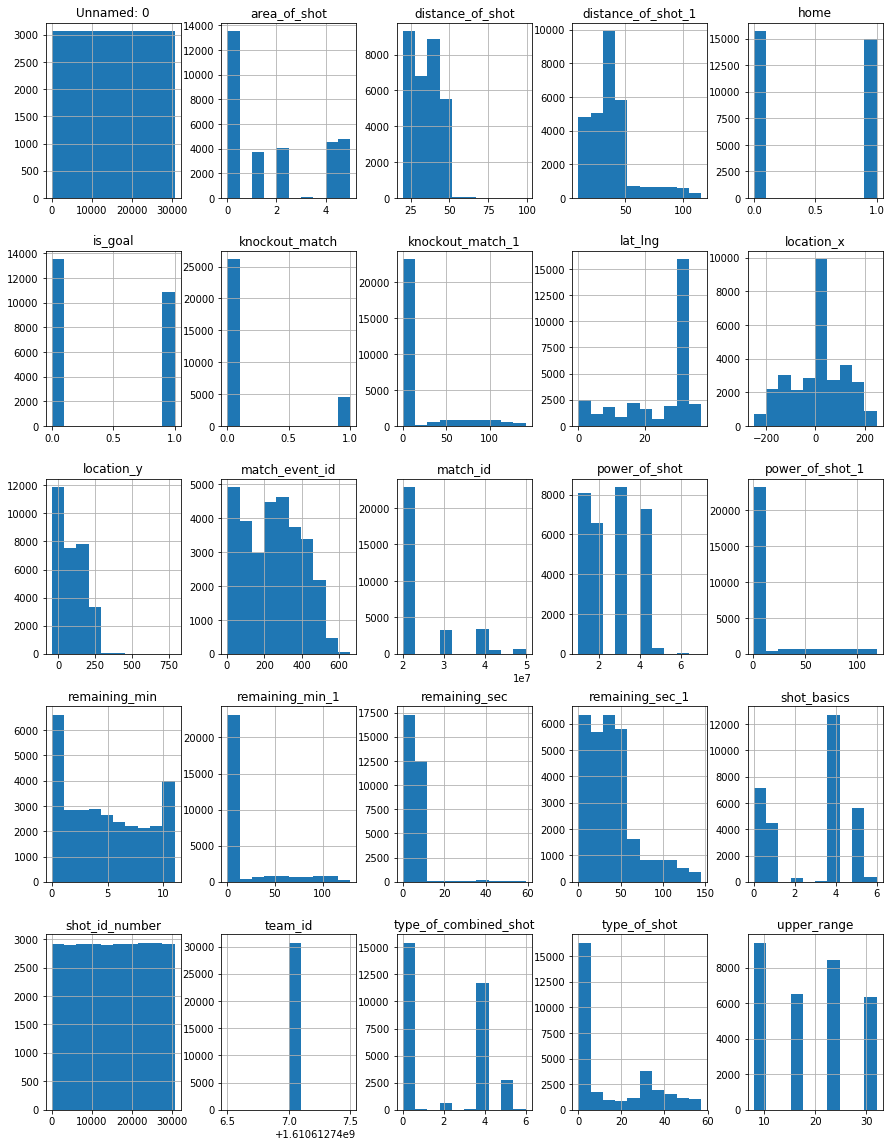

In [116]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138cfa5f8>,
      dtype=object)

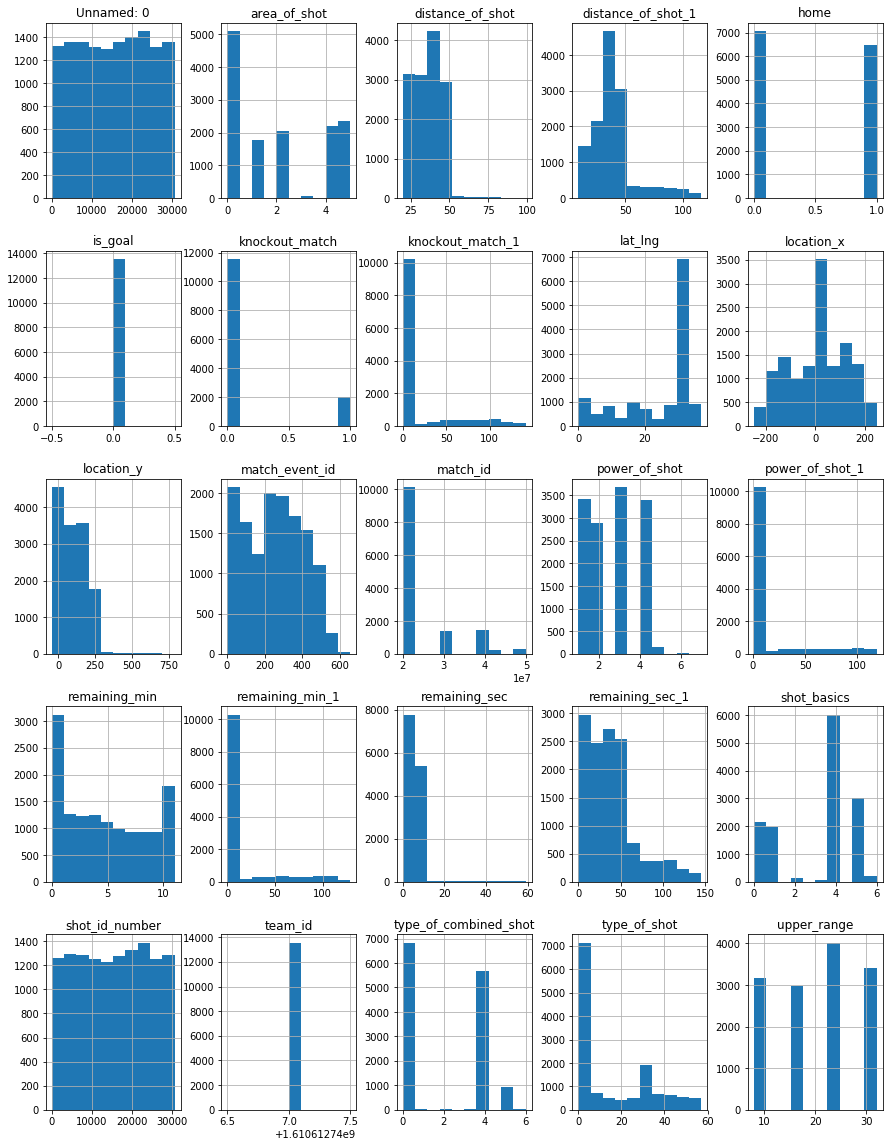

In [122]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[df.is_goal == 0].hist(ax=ax)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13975bfd0>,
      dtype=object)

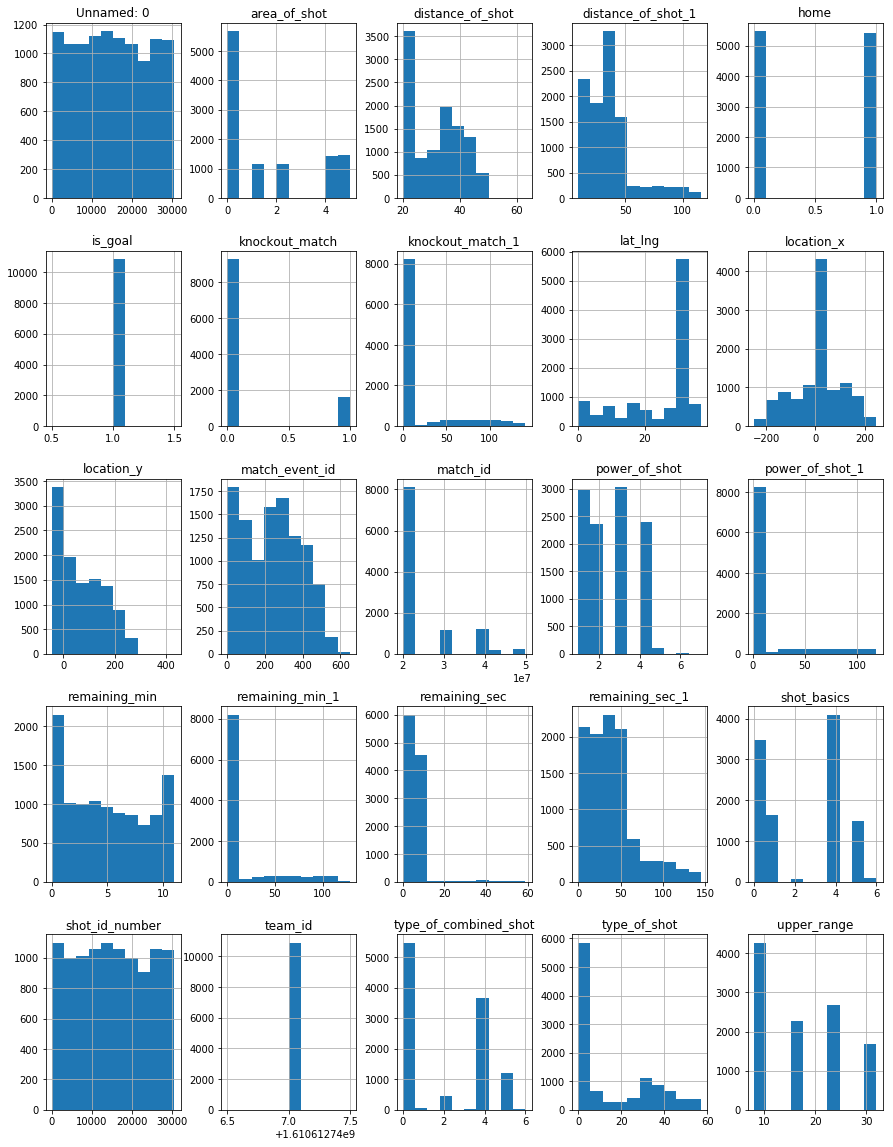

In [123]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[df.is_goal == 1].hist(ax=ax)

In [44]:
old_df = df.copy()

In [115]:
df = old_df.copy()
df.shape

(30697, 34)

In [59]:
for col in df.columns:
    print (f"'{col}'", end=',')

'Unnamed: 0','match_event_id','location_x','location_y','remaining_min','power_of_shot','knockout_match','game_season','remaining_sec','distance_of_shot','is_goal','area_of_shot','shot_basics','range_of_shot','team_name','date_of_game','home/away','shot_id_number','lat_lng','type_of_shot','type_of_combined_shot','match_id','team_id','remaining_min_1','power_of_shot_1','knockout_match_1','remaining_sec_1','distance_of_shot_1','year','month','day','lower_range','upper_range','home',

In [60]:
'''
    Univariate Selection
'''
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


considering_features = ['match_event_id','location_x','location_y'\
                        ,'remaining_min','power_of_shot','knockout_match'\
                        ,'game_season', 'distance_of_shot','area_of_shot'\
                        ,'shot_basics','lat_lng','type_of_shot'\
                        ,'type_of_combined_shot', 'lower_range'\
                        ,'upper_range','home','year','month','day'\
                        ,'is_goal', 'shot_id_number', 'remaining_sec'] # These 2 are not considered as training features



dt = df[df.is_goal.notnull()]

dt = dt[considering_features]

X = dt.loc[:, (dt.columns != 'is_goal') & (dt.columns != 'shot_id_number') ]
cols = X.columns

y = dt[['is_goal']]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                    Specs       Score
13            lower_range  237.462832
14            upper_range  237.462832
9             shot_basics  195.842868
8            area_of_shot  138.982234
7        distance_of_shot   76.633104
2              location_y   34.448582
0          match_event_id    4.725222
3           remaining_min    4.225374
15                   home    4.008968
4           power_of_shot    3.793183
6             game_season    1.291374
16                   year    1.105969
19          remaining_sec    0.810015
12  type_of_combined_shot    0.763052
10                lat_lng    0.684391
11           type_of_shot    0.271351
17                  month    0.188948
18                    day    0.066180
1              location_x    0.052741
5          knockout_match    0.000766


In [61]:
'''
    Correlation Matrix with Heatmap
'''

import seaborn as sns

considering_features = ['match_event_id','location_x','location_y'\
                        ,'remaining_min','power_of_shot','knockout_match'\
                        ,'game_season', 'distance_of_shot','area_of_shot'\
                        ,'shot_basics','lat_lng','type_of_shot'\
                        ,'type_of_combined_shot', 'lower_range'\
                        ,'upper_range','home','year','month','day'\
                        ,'is_goal', 'shot_id_number'] # These 2 are not considered as training features

# considering_features = ['match_event_id','location_x','location_y'\
#                         ,'remaining_min','power_of_shot','knockout_match'\
#                         ,'game_season', 'distance_of_shot','area_of_shot'\
#                         ,'shot_basics','lat_lng','type_of_shot'\
#                         ,'type_of_combined_shot', 'month','year','lower_range'\
#                         ,'upper_range','home',\
#                         'is_goal', 'shot_id_number'] # These 2 are not considered as training features


dt = df.copy()

dt = dt[considering_features]

#get correlations of each features in dataset
corrmat = dt.corr()
top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# g = sns.heatmap(dt[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
# considering_features = ['match_event_id','location_x','location_y'\
#                         ,'remaining_min','power_of_shot','knockout_match'\
#                         ,'game_season', 'distance_of_shot','area_of_shot'\
#                         ,'shot_basics','lat_lng','type_of_shot'\
#                         ,'type_of_combined_shot', 'month','year','lower_range'\
#                         ,'upper_range','home',\
#                         'is_goal', 'shot_id_number'] # These 2 are not considered as training features

# categorical_features = ['power_of_shot', 'knockout_match', 'game_season', 'area_of_shot' ,'shot_basics'\
#                        ,'lat_lng', 'type_of_shot', 'type_of_combined_shot', 'month','year','lower_range'\
#                         ,'upper_range','home']


# considering_features = ['match_event_id','location_x','location_y', 'power_of_shot'\
#                         ,'remaining_min','knockout_match'\
#                         , 'distance_of_shot','area_of_shot'\
#                         ,'shot_basics','type_of_shot'\
#                         ,'type_of_combined_shot'\
#                         ,'upper_range','home',\
#                         'is_goal', 'shot_id_number'] # These 2 are not considered as training features

considering_features = ['match_event_id','location_x','location_y'\
                        ,'remaining_min','power_of_shot','knockout_match'\
                        ,'game_season', 'distance_of_shot','area_of_shot'\
                        ,'shot_basics','lat_lng','month','year','type_of_shot'\
                        ,'type_of_combined_shot'\
                        ,'upper_range','home'\
                        ,'is_goal', 'shot_id_number'] # These 2 are not considered as training features

categorical_features = ['area_of_shot', 'power_of_shot', 'shot_basics'\
                       , 'type_of_shot', 'type_of_combined_shot'\
                        ,'upper_range']

In [63]:
'''
    One Hot Encoding
'''
df = df[considering_features]

encoded = pd.get_dummies(data=df, columns = categorical_features)
encoded.columns = encoded.columns.str.replace(".", "_")
encoded.columns = encoded.columns.str.replace("-", "_")

for col in encoded.columns:
    print (f"'{col}'", end=',')
df = encoded
df.shape

'match_event_id','location_x','location_y','remaining_min','remaining_sec','knockout_match','game_season','distance_of_shot','lat_lng','month','year','home','is_goal','shot_id_number','area_of_shot_0','area_of_shot_1','area_of_shot_2','area_of_shot_3','area_of_shot_4','area_of_shot_5','power_of_shot_1_0','power_of_shot_2_0','power_of_shot_3_0','power_of_shot_4_0','power_of_shot_5_0','power_of_shot_6_0','power_of_shot_7_0','shot_basics_0','shot_basics_1','shot_basics_2','shot_basics_3','shot_basics_4','shot_basics_5','shot_basics_6','type_of_shot_0','type_of_shot_1','type_of_shot_2','type_of_shot_3','type_of_shot_4','type_of_shot_5','type_of_shot_6','type_of_shot_7','type_of_shot_8','type_of_shot_9','type_of_shot_10','type_of_shot_11','type_of_shot_12','type_of_shot_13','type_of_shot_14','type_of_shot_15','type_of_shot_16','type_of_shot_17','type_of_shot_18','type_of_shot_19','type_of_shot_20','type_of_shot_21','type_of_shot_22','type_of_shot_23','type_of_shot_24','type_of_shot_25','typ

(30697, 103)

In [64]:
df.shape

(30697, 103)

In [65]:
submission = df[df.is_goal.isnull()]
submission = submission.copy()
submission.loc[:, 'shot_id_number'] = submission.index + 1

data = df[df.is_goal.notnull()]
df.shape, data.shape, submission.shape

((30697, 103), (24429, 103), (6268, 103))

In [66]:
def plotPrecisionRecallCurve(y_test, y_pred, average_precision):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from inspect import signature

    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [67]:
def plotROCCurve(y_test, y_pred, model):
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [68]:
def evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier):
    # Making the Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    cm_train = confusion_matrix(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    average_precision = average_precision_score(y_test, y_pred)
    print (f"{cm_test} \n {accuracy_test} \n\n {cm_train} \n {accuracy_train} \n\nPrecision Recall Score = {average_precision} ")
    print (f"\n\nClassification Report\n {classification_report(y_test, y_pred)}\n")
#     plotROCCurve(y_test, y_pred, classifier)
#     plotPrecisionRecallCurve(y_test, y_pred, average_precision)

    

In [69]:
# cols = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].columns
# X = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].values
# y = data[['is_goal']].values

# ratio = (len(y) - y.sum()) / (y.sum())
# print(ratio)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1102  255]
 [ 652  434]] 
 0.628735161686451 

 [[10011  2182]
 [ 5854  3939]] 
 0.6344946784317292 

Precision Recall Score = 0.5186123321015734 


Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.81      0.71      1357
         1.0       0.63      0.40      0.49      1086

    accuracy                           0.63      2443
   macro avg       0.63      0.61      0.60      2443
weighted avg       0.63      0.63      0.61      2443




/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1168  189]
 [ 712  374]] 
 0.6311911584117887 

 [[10681  1512]
 [ 6272  3521]] 
 0.6459565177840444 

Precision Recall Score = 0.5202180590415826 


Classification Report
               precision    recall  f1-score   support

         0.0       0.62      0.86      0.72      1357
         1.0       0.66      0.34      0.45      1086

    accuracy                           0.63      2443
   macro avg       0.64      0.60      0.59      2443
weighted avg       0.64      0.63      0.60      2443


[0.00532071 0.00679075 0.01027811 0.01172038 0.00609637 0.
 0.00859991 0.08976374 0.00665355 0.0064177  0.01115487 0.00764706
 0.02355803 0.0131442  0.         0.         0.         0.0031054
 0.         0.00045171 0.0125044  0.01405324 0.         0.
 0.         0.03606953 0.         0.         0.         0.
 0.         0.         0.01494188 0.         0.         0.
 0.         0.03519667 0.         0.         0.01915205 0.
 0.01749137 0.         0.         0.         0.         0.
 0.       

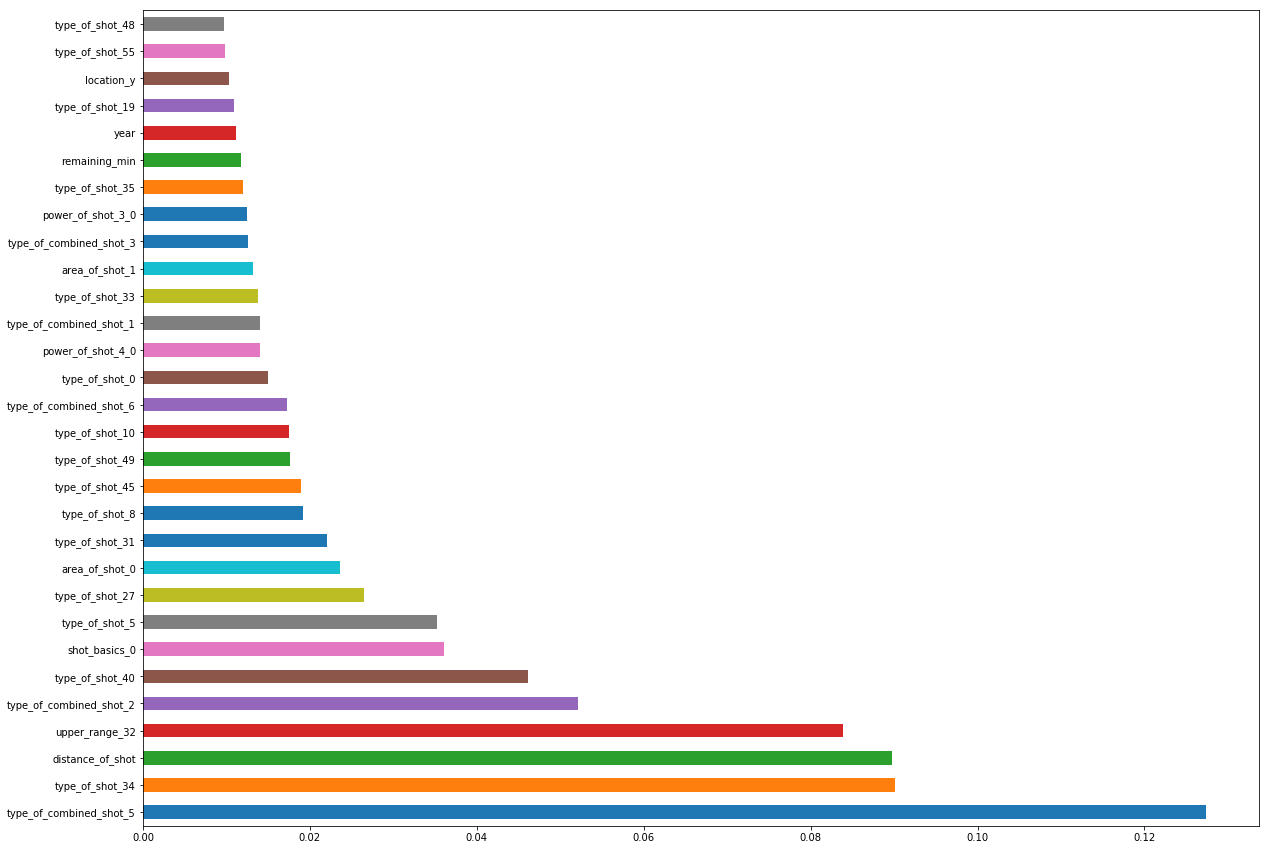

In [71]:
cols = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].columns
X = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].values
y = data[['is_goal']].values

ratio = (len(y) - y.sum()) / (y.sum())

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(), [5, 6, 7, 8, 10, 11])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
#     remainder='passthrough'                         # Leave the rest of the columns untouched
# )

# X = np.array(ct.fit_transform(X), dtype=np.float)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # from 10 observations- 2 in test set and 8 in training set, random state is not necessary

''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1)
logistic.fit(X_train, y_train)
y_pred_train = logistic.predict(X_train)
y_pred = logistic.predict(X_test)
evaluatePredictions(y_test, y_pred, y_train, y_pred_train, logistic)
# probs_logistic = logistic.predict_proba(X_test)


from xgboost import XGBClassifier
# xboost_classifier = XGBClassifier(learning_rate =0.1,
#                                  n_estimators=149,
#                                  max_depth=4,
#                                  min_child_weight=5,
#                                  gamma=0.3,
#                                  reg_alpha=0.1,
#                                  objective= 'binary:logistic',
#                                  scale_pos_weight=1,
#                                  seed=27)


xboost_classifier = XGBClassifier(random_state=0, scale_pos_weight=1)
xboost_classifier.fit(X_train, y_train)
y_pred_train = xboost_classifier.predict(X_train)
y_pred = xboost_classifier.predict(X_test)
evaluatePredictions(y_test, y_pred, y_train, y_pred_train, xboost_classifier)
# probs_xgboost = xboost_classifier.predict_proba(X_test)

print(xboost_classifier.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# plt.figure(figsize=(20,15))
# feat_importances = pd.Series(xboost_classifier.feature_importances_, index=cols)
# feat_importances.nlargest(30).plot(kind='barh')
# plt.show()


In [51]:

X = submission.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].values
y = submission[['is_goal']].values

# ''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =sc_X.fit_transform(X)

probs_logistic = logistic.predict_proba(X)
solution_logistic = pd.DataFrame(columns=['shot_id_number', 'is_goal'])

solution_logistic['shot_id_number'] = submission['shot_id_number']
solution_logistic['is_goal'] = probs_logistic

probs_xgboost = xboost_classifier.predict_proba(X)
solution_xgboost = pd.DataFrame(columns=['shot_id_number', 'is_goal'])

solution_xgboost['shot_id_number'] = submission['shot_id_number']
solution_xgboost['is_goal'] = probs_xgboost



# solution.to_csv("bhavi_chawla_280998_code_5.csv",index=False)
# solution_logistic.to_csv("logistic.csv",index=False)
solution_xgboost.to_csv("bhavi_chawla_280998_code_5.csv",index=False)

In [52]:
# cols = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].columns
# X = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].values
# y = data[['is_goal']].values

# ratio = (len(y) - y.sum()) / (y.sum())

# from sklearn.utils import shuffle
# X, y = shuffle(X, y, random_state=0)

# ''' Feature Scaling '''
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X =sc_X.fit_transform(X)
# # X_test =sc_X.transform(X_test)

# from xgboost import XGBClassifier
# # xboost_classifier = XGBClassifier(learning_rate =0.1,
# #                                  n_estimators=149,
# #                                  max_depth=4,
# #                                  min_child_weight=5,
# #                                  gamma=0.3,
# #                                  reg_alpha=0.1,
# #                                  objective= 'binary:logistic',
# #                                  scale_pos_weight=1,
# #                                  seed=27)


# xboost_classifier = XGBClassifier(random_state=0)
# xboost_classifier.fit(X, y)

# ####


# X = submission.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].values
# y = submission[['is_goal']].values

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X =sc_X.fit_transform(X)

# probs_xgboost = xboost_classifier.predict_proba(X)
# solution_xgboost = pd.DataFrame(columns=['shot_id_number', 'is_goal'])

# solution_xgboost['shot_id_number'] = submission['shot_id_number']
# solution_xgboost['is_goal'] = probs_xgboost

# solution_xgboost.to_csv("bhavi_chawla_280998_code_6.csv",index=False)

In [53]:
# 0.5490110205963614
# 0.5498407242897244

In [54]:
!jupyter nbconvert --to script main.ipynb

[NbConvertApp] Converting notebook main.ipynb to script
/Users/bhavi/anaconda3/lib/python3.6/site-packages/nbconvert/filters/strings.py:204: UserWarning: IPython is needed to transform IPython syntax to pure Python. Install ipython if you need this functionality.
  "IPython is needed to transform IPython syntax to pure Python."
[NbConvertApp] Writing 48585 bytes to main.py


<h1>Parameter Tuning XGBoost </h1>

In [55]:
# '''
#     Parameter Tuning XGBoost
# '''
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import cross_validate
# from sklearn import metrics   #Additional scklearn functions
# from sklearn.model_selection import learning_curve, GridSearchCV  #Perforing grid search
# # from sklearn import cross_validation, metrics   #Additional scklearn functions
# # from sklearn.grid_search import GridSearchCV   #Perforing grid search

# import matplotlib.pylab as plt
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12, 4

# cols = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].columns
# train = data.loc[:, (data.columns != 'shot_id_number') ]
# y = data[['is_goal']].values

# target = 'is_goal'
# IDcol = 'ID'

# def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],\
#                           nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds,\
#                           verbose_eval=True)
#         alg.set_params(n_estimators=cvresult.shape[0])
    
#     #Fit the algorithm on the data
#     alg.fit(dtrain[predictors], dtrain['is_goal'],eval_metric='auc')
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
#     #Print model report:
#     print ("\nModel Report")
#     print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_goal'].values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['is_goal'], dtrain_predprob))
    
    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
    
# #Choose all predictors except target & IDcols
# predictors = data.loc[:, (data.columns != 'is_goal') & (data.columns != 'shot_id_number') ].columns

# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# modelfit(xgb1, train, predictors)


In [56]:
'''
learning_rate = 0.1
Estimators = 149,
Accuracy : 0.6602
AUC Score (Train): 0.727088


learning_rate = 0.5
Estimators = 63,
Accuracy : 0.6528
AUC Score (Train): 0.695635

learning_rate = 0.3
Estimators = 77
Accuracy : 0.6568
AUC Score (Train): 0.710403

'''

'\nlearning_rate = 0.1\nEstimators = 149,\nAccuracy : 0.6602\nAUC Score (Train): 0.727088\n\n\nlearning_rate = 0.5\nEstimators = 63,\nAccuracy : 0.6528\nAUC Score (Train): 0.695635\n\nlearning_rate = 0.3\nEstimators = 77\nAccuracy : 0.6568\nAUC Score (Train): 0.710403\n\n'

In [57]:
# param_test1 = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
#  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(train[predictors],train[target])


In [58]:
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [59]:
# param_test2 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(train[predictors],train[target])
# gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [60]:
# param_test2b = {
#  'min_child_weight':[6,8,10,12]
# }
# gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2b.fit(train[predictors],train[target])

In [61]:
# modelfit(gsearch2b.best_estimator_, train, predictors)
# gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

In [62]:
# '''
#     TUNING GAMA
# '''
# param_test3 = {
#  'gamma':[i/10.0 for i in range(0,5)]
# }
# gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch3.fit(train[predictors],train[target])
# gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_


In [63]:
# '''
#     Recalibrating number of boosting rounds
# '''
# xgb2 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0.3,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# modelfit(xgb2, train, predictors)


In [64]:
# '''
#     Tune subsample and colsample_bytree
# '''
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
#  min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(train[predictors],train[target])
# gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [65]:
# '''
# Here, we found 0.8 as the optimum value for 
# both subsample and colsample_bytree. Now we should try values in 0.05 interval around these.
# '''
# param_test5 = {
#  'subsample':[i/100.0 for i in range(80,95,5)],
#  'colsample_bytree':[i/100.0 for i in range(55,65,5)]
# }
# gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=235, max_depth=4,
#  min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch5.fit(train[predictors],train[target])

In [66]:
# gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

In [67]:
# '''
# Tuning Regularization Parameters
# '''
# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }
# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=235, max_depth=4,
#  min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.55,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch6.fit(train[predictors],train[target])


In [68]:
# gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

In [69]:
# param_test7 = {
#  'reg_alpha':[0, 0.05, 0.1, 0.15, 0.2 ]
# }
# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=255, max_depth=4,
#  min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.55,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch7.fit(train[predictors],train[target])
# gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

In [70]:
# xgb4 = XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=4,
#  min_child_weight=5,
#  gamma=0.3,
#  subsample=0.9,
#  colsample_bytree=0.55,
#  reg_alpha=0.1,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# modelfit(xgb4, train, predictors)

In [71]:
'''
({'mean_fit_time': array([25.47543125, 29.29744964, 37.45478344, 51.23701358, 45.63270326,
         61.34791794, 63.19848642, 56.18198481, 58.7547133 , 59.78487515,
         60.19948406, 55.76035213]),
  'std_fit_time': array([ 0.53580202,  6.02017352,  0.63569917,  1.8163702 , 12.13455724,
          9.0683577 ,  2.39844681,  2.17152607,  3.73682286,  2.62456035,
          1.12735729,  4.10586478]),
  'mean_score_time': array([0.06946297, 0.07501221, 0.17372174, 0.20709124, 0.25987864,
         0.15443721, 0.26897616, 0.21223593, 0.18476658, 0.1734283 ,
         0.20747576, 0.14157748]),
  'std_score_time': array([0.0065865 , 0.00747546, 0.07382257, 0.08597596, 0.1022942 ,
         0.03309303, 0.11645871, 0.06307146, 0.0392818 , 0.02075738,
         0.06637969, 0.03079519]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 3, 'min_child_weight': 1},
   {'max_depth': 3, 'min_child_weight': 3},
   {'max_depth': 3, 'min_child_weight': 5},
   {'max_depth': 5, 'min_child_weight': 1},
   {'max_depth': 5, 'min_child_weight': 3},
   {'max_depth': 5, 'min_child_weight': 5},
   {'max_depth': 7, 'min_child_weight': 1},
   {'max_depth': 7, 'min_child_weight': 3},
   {'max_depth': 7, 'min_child_weight': 5},
   {'max_depth': 9, 'min_child_weight': 1},
   {'max_depth': 9, 'min_child_weight': 3},
   {'max_depth': 9, 'min_child_weight': 5}],
  'split0_test_score': array([0.65859375, 0.65832107, 0.65746317, 0.65620218, 0.65849361,
         0.65713478, 0.65729401, 0.65315332, 0.65398561, 0.65681114,
         0.65669489, 0.65556753]),
  'split1_test_score': array([0.63414827, 0.6327172 , 0.63272449, 0.63118234, 0.62533873,
         0.63347123, 0.6273156 , 0.62885936, 0.62369662, 0.62028901,
         0.62614652, 0.62337815]),
  'split2_test_score': array([0.64755535, 0.64630454, 0.64629029, 0.6459675 , 0.65117671,
         0.65230492, 0.64069436, 0.64240812, 0.64426925, 0.62937556,
         0.64228077, 0.63702196]),
  'split3_test_score': array([0.64026719, 0.63931568, 0.64157998, 0.63952163, 0.63981467,
         0.6418954 , 0.63134946, 0.63694565, 0.63485957, 0.622734  ,
         0.62925185, 0.63085692]),
  'split4_test_score': array([0.65036493, 0.64987004, 0.65032812, 0.64807278, 0.64862052,
         0.64793757, 0.64963812, 0.6510551 , 0.64363405, 0.64543547,
         0.6430769 , 0.64304865]),
  'mean_test_score': array([0.6461859 , 0.6453057 , 0.64567721, 0.64418929, 0.64468885,
         0.64654878, 0.64125831, 0.64248431, 0.64008902, 0.63492904,
         0.63949019, 0.63797464]),
  'std_test_score': array([0.00840512, 0.00878159, 0.00831235, 0.00840858, 0.01136931,
         0.0082438 , 0.01113793, 0.00898452, 0.01019034, 0.01402214,
         0.01095016, 0.01095338]),
  'rank_test_score': array([ 2,  4,  3,  6,  5,  1,  8,  7,  9, 12, 10, 11], dtype=int32)},
 {'max_depth': 5, 'min_child_weight': 5},
 0.6465487780417231)
 
 
 
 
 
 
 
 ({'mean_fit_time': array([28.97310758, 29.19032226, 26.44795671, 32.02436671, 30.11715417,
         31.42415733, 34.43228965, 36.22571115, 30.53552098]),
  'std_fit_time': array([1.03048461, 2.03615444, 0.25609932, 0.95212453, 0.30985652,
         1.70290915, 1.46366673, 1.47890386, 6.02755877]),
  'mean_score_time': array([0.08572855, 0.08006516, 0.07456479, 0.09054503, 0.08925452,
         0.08765597, 0.09144964, 0.11746426, 0.07450438]),
  'std_score_time': array([0.01973125, 0.00963097, 0.00436722, 0.00995394, 0.0104075 ,
         0.0154485 , 0.00340498, 0.05036184, 0.01114788]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 4, 'min_child_weight': 4},
   {'max_depth': 4, 'min_child_weight': 5},
   {'max_depth': 4, 'min_child_weight': 6},
   {'max_depth': 5, 'min_child_weight': 4},
   {'max_depth': 5, 'min_child_weight': 5},
   {'max_depth': 5, 'min_child_weight': 6},
   {'max_depth': 6, 'min_child_weight': 4},
   {'max_depth': 6, 'min_child_weight': 5},
   {'max_depth': 6, 'min_child_weight': 6}],
  'split0_test_score': array([0.65867667, 0.65922908, 0.65980717, 0.65839653, 0.65713478,
         0.65443864, 0.65482757, 0.65610399, 0.65871678]),
  'split1_test_score': array([0.6346186 , 0.63633253, 0.6346175 , 0.62868995, 0.63347123,
         0.63285973, 0.62797653, 0.62974795, 0.62981155]),
  'split2_test_score': array([0.65055893, 0.65201824, 0.64821221, 0.65244702, 0.65230492,
         0.6481181 , 0.64482479, 0.64633989, 0.64538304]),
  'split3_test_score': array([0.64389067, 0.64088496, 0.64260806, 0.64157634, 0.6418954 ,
         0.6419311 , 0.63852366, 0.63771689, 0.63855113]),
  'split4_test_score': array([0.65062086, 0.65179845, 0.64980184, 0.64903796, 0.64793757,
         0.64896959, 0.64640811, 0.64936184, 0.64703949]),
  'mean_test_score': array([0.64767315, 0.64805265, 0.64700936, 0.64602956, 0.64654878,
         0.64526343, 0.64251213, 0.64385411, 0.6439004 ]),
  'std_test_score': array([0.00803521, 0.00828742, 0.00831816, 0.01023396, 0.0082438 ,
         0.00736241, 0.00893743, 0.00920025, 0.00957797]),
  'rank_test_score': array([2, 1, 3, 5, 4, 6, 9, 8, 7], dtype=int32)},
 {'max_depth': 4, 'min_child_weight': 5},
 0.6480526533601416)
 
 
 
 
 GAMMA
 
 ({'mean_fit_time': array([28.59535127, 27.10575109, 28.10539389, 28.15843081, 25.84967532]),
  'std_fit_time': array([0.63246245, 0.43370455, 1.21017517, 0.69832044, 5.40973399]),
  'mean_score_time': array([0.07324219, 0.07971759, 0.09245124, 0.07482023, 0.06453662]),
  'std_score_time': array([0.00088793, 0.01010845, 0.02712733, 0.0046064 , 0.01475829]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.65980717, 0.65982956, 0.65942715, 0.65925146, 0.65944902]),
  'split1_test_score': array([0.6346175 , 0.63361613, 0.63360961, 0.63426426, 0.63465065]),
  'split2_test_score': array([0.64821221, 0.64870535, 0.64778827, 0.6484782 , 0.64811454]),
  'split3_test_score': array([0.64260806, 0.6426602 , 0.64269971, 0.64438414, 0.64269301]),
  'split4_test_score': array([0.64980184, 0.64978267, 0.64997557, 0.64997608, 0.65126581]),
  'mean_test_score': array([0.64700936, 0.64691878, 0.64670006, 0.64727083, 0.64723461]),
  'std_test_score': array([0.00831816, 0.00863919, 0.00850005, 0.00812177, 0.00830902]),
  'rank_test_score': array([3, 4, 5, 1, 2], dtype=int32)},
 {'gamma': 0.3},
 0.6472708288736031)
 
 
 
 
 
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.3,
 
 [235]	train-auc:0.733589+0.00160811	test-auc:0.650496+0.00236112

Model Report
Accuracy : 0.6552
AUC Score (Train): 0.715594


-------------------------------

Tune subsample and colsample_bytree - 

{'colsample_bytree': 0.6, 'subsample': 0.9},
 0.6473191242898737)
 
 
 
  {'colsample_bytree': 0.55, 'subsample': 0.9},
 0.6474671923222781)
 
 
 
 
 -----------------------------------
 Tuning Regularization parameter
 
{'reg_alpha': 0.1},
 0.6482818380216636)
 
 
 {'reg_alpha': 0.1},
 0.6479204871740654)
 

'''

"\n({'mean_fit_time': array([25.47543125, 29.29744964, 37.45478344, 51.23701358, 45.63270326,\n         61.34791794, 63.19848642, 56.18198481, 58.7547133 , 59.78487515,\n         60.19948406, 55.76035213]),\n  'std_fit_time': array([ 0.53580202,  6.02017352,  0.63569917,  1.8163702 , 12.13455724,\n          9.0683577 ,  2.39844681,  2.17152607,  3.73682286,  2.62456035,\n          1.12735729,  4.10586478]),\n  'mean_score_time': array([0.06946297, 0.07501221, 0.17372174, 0.20709124, 0.25987864,\n         0.15443721, 0.26897616, 0.21223593, 0.18476658, 0.1734283 ,\n         0.20747576, 0.14157748]),\n  'std_score_time': array([0.0065865 , 0.00747546, 0.07382257, 0.08597596, 0.1022942 ,\n         0.03309303, 0.11645871, 0.06307146, 0.0392818 , 0.02075738,\n         0.06637969, 0.03079519]),\n  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],\n               mask=[False, False, False, False, False, False, False, False,\n                     False, False, False, F

In [72]:
# !jupyter nbconvert --to script main.ipynb